In [ ]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

In [ ]:
df=pd.read_table("Restaurant_Reviews.tsv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
df['Liked'].nunique()#nunique() method gives the number of unique values in the particular column

2

In [ ]:
print(df['Liked'].unique())#unique() method gives unique values in the particular column.

[1 0]


In [ ]:
df['Liked'].value_counts()#value_counts() method gives the number of times the particular value repeated in that column through the data frame.

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


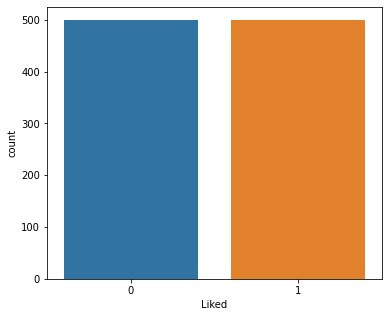

In [ ]:
plt.figure(figsize=(6,5))   #visualizations
sns.countplot(x=df.Liked); #countplot() method is used to Show the counts of observations in each categorical bin using bars.

In [ ]:
#Define X and Y
x=df['Review'].values
y=df['Liked'].values

In [ ]:
#Split the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

#View the Shapes of Train Sets and Test Sets
x_train.shape

(750,)

In [ ]:
x_test.shape

(250,)

In [ ]:
y_train.shape

(750,)

In [ ]:
y_test.shape

(250,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #Scikit-learn's CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.
vect=CountVectorizer(stop_words='english') #The words which are generally filtered out before processing a natural language are called stop words

In [ ]:
x_train_vect=vect.fit_transform(x_train)  #This count vectorizer transforms the text into a vector based on the count 
x_test_vect=vect.transform(x_test)      #of the words like the number of times the word is repeated in the sentence.
# to train the machine use model.fit
'''The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling.
The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.
The fit_transform() method does both fits and transform.'''

In [ ]:
#Import Support Vector Classifier(SVC) from Support Vector Machine (SVM) library and assign it to a variable called a model.
from sklearn.svm import SVC
model=SVC()

In [ ]:
#For that import make_pipeline from the pipeline library. And pass CountVectorizer and SVC as arguments into it.
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(CountVectorizer(),SVC())



In [ ]:
#Train the Model with Training Sets
text_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
y_pred=text_model.predict(x_test)#precdit
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.92

In [ ]:
#We can save the model and for that, we have to use joblib. Import joblib and using dump method we can save it.
# We have to pass two arguments in it. one is the model and the other is the name of our file.
import joblib
joblib.dump(text_model,'Project')

['Project']

In [ ]:
#And again to use it we have to use the load method. We can retrieve it using the load method and save it to a variable.
import joblib
text_model=joblib.load('Project')

In [ ]:
#Prediction of New Reviews using the Model
text_model.predict(['delicious food'])

array([1])

In [ ]:
text_model.predict(["food taste was very bad"])

array([0])

In [ ]:
#Define X and Y
x=df['Review'].values
y=df['Liked'].values




In [ ]:
#Split the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

#View the Shapes of Train Sets and Test Sets
x_train.shape

(750,)

In [ ]:
# Bag of word: vectors word frequency(count)
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from data like symbols

token = RegexpTokenizer(r'[a-zA-Z 0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(df['Review'])

print(text_counts.shape)

(1000, 1834)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                    df['Liked'], 
                                                    test_size=0.4, 
                                                    random_state=0)
"""The random state hyperparameter in the train_test_split() function controls the shuffling process. 
With random_state=None , we get different train and test sets across different executions and the shuffling process is
out of control. With random_state=0 ,we get the same train and test sets across different executions."""

In [ ]:
"""MultinomialNB The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural 
Language Processing (NLP).The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem"""


from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


 


MultinomialNB Accuracy: 0.78


In [ ]:
# Transform into matrix
val=cv.transform(["Service of the restaurant is very slow but food was delicous"])

# make prediction
clf.predict(val)

array([0])

In [ ]:
val=cv.transform(["very good taste"])

# make prediction
clf.predict(val)

array([1])

SENTIMENT ANALYSIS The recent explosion in sentiment related research has focused on finding low-level features that will help predict the polarity of a phrase, sentence or text. Features, widely understood, may be individual words that tend to express sentiment, or other features that indicate not only sentiment, but also polarity. Sentiment analysis predicts the phrase or sentence weather it is positive negative or neutral.

TWITTER ANALYSIS Tweets are often useful in generating a vast amount of sentiment data upon analysis. These data are useful in understanding the opinion of the people about a variety of topics.Therefore we need to develop an Automated Machine Learning Sentiment Analysis Model in order to compute the customer perception. Due to the presence of non-useful characters along with useful data, it becomes difficult to implement models on them.